In [1]:
# Core libraries
import numpy as np
import matplotlib.pyplot as plt

# Audio processing
import librosa
import librosa.display

# TensorFlow for CNN & quantization
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
# Download a small version for testing
!wget -O speech_commands_v0.02.tar.gz http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz
!tar -xvzf speech_commands_v0.02.tar.gz

Streaming output truncated to the last 5000 lines.
./on/fc3ba625_nohash_0.wav
./on/db9d52d2_nohash_0.wav
./on/72242187_nohash_4.wav
./on/b0f5b16d_nohash_0.wav
./on/d9aa8c90_nohash_1.wav
./on/525eaa62_nohash_0.wav
./on/42e3f068_nohash_0.wav
./on/94d370bf_nohash_4.wav
./on/bf8d5617_nohash_0.wav
./on/e2b7d6d6_nohash_2.wav
./on/89ed36ab_nohash_0.wav
./on/30276d03_nohash_1.wav
./on/364c0853_nohash_0.wav
./on/7cbf645a_nohash_0.wav
./on/c98bbbd3_nohash_2.wav
./on/9a7c1f83_nohash_5.wav
./on/3589bc72_nohash_0.wav
./on/3ae5c04f_nohash_0.wav
./on/adc216c5_nohash_2.wav
./on/c50f55b8_nohash_15.wav
./on/324210dd_nohash_2.wav
./on/c120e80e_nohash_2.wav
./on/69086eb0_nohash_0.wav
./on/dce05676_nohash_1.wav
./on/435695e3_nohash_1.wav
./on/179a61b7_nohash_1.wav
./on/f5341341_nohash_0.wav
./on/91b03183_nohash_0.wav
./on/96d8bb6f_nohash_2.wav
./on/6a1908f8_nohash_0.wav
./on/6ace4fe1_nohash_1.wav
./on/84d1e469_nohash_1.wav
./on/ba676390_nohash_0.wav
./on/1dc86f91_nohash_4.wav
./on/3a929277_nohash_2.wav
./o

In [5]:
!tar -xvzf speech_commands_v0.02.tar.gz

Streaming output truncated to the last 5000 lines.
./on/fc3ba625_nohash_0.wav
./on/db9d52d2_nohash_0.wav
./on/72242187_nohash_4.wav
./on/b0f5b16d_nohash_0.wav
./on/d9aa8c90_nohash_1.wav
./on/525eaa62_nohash_0.wav
./on/42e3f068_nohash_0.wav
./on/94d370bf_nohash_4.wav
./on/bf8d5617_nohash_0.wav
./on/e2b7d6d6_nohash_2.wav
./on/89ed36ab_nohash_0.wav
./on/30276d03_nohash_1.wav
./on/364c0853_nohash_0.wav
./on/7cbf645a_nohash_0.wav
./on/c98bbbd3_nohash_2.wav
./on/9a7c1f83_nohash_5.wav
./on/3589bc72_nohash_0.wav
./on/3ae5c04f_nohash_0.wav
./on/adc216c5_nohash_2.wav
./on/c50f55b8_nohash_15.wav
./on/324210dd_nohash_2.wav
./on/c120e80e_nohash_2.wav
./on/69086eb0_nohash_0.wav
./on/dce05676_nohash_1.wav
./on/435695e3_nohash_1.wav
./on/179a61b7_nohash_1.wav
./on/f5341341_nohash_0.wav
./on/91b03183_nohash_0.wav
./on/96d8bb6f_nohash_2.wav
./on/6a1908f8_nohash_0.wav
./on/6ace4fe1_nohash_1.wav
./on/84d1e469_nohash_1.wav
./on/ba676390_nohash_0.wav
./on/1dc86f91_nohash_4.wav
./on/3a929277_nohash_2.wav
./o

Total audio files: 7478
Label distribution: {'on': 3845, 'happy': 2054, 'follow': 1579}


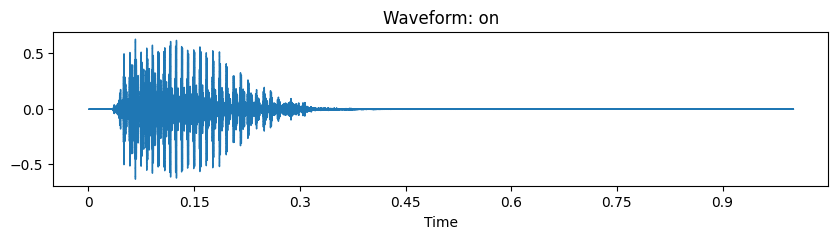

In [7]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Define your dataset folders
classes = ['on', 'happy', 'follow']
data_dir = './'  # assuming folders are in Colab root

file_paths = []
labels = []

# Collect all file paths and their labels
for idx, class_name in enumerate(classes):
    folder_path = os.path.join(data_dir, class_name)
    if os.path.exists(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith('.wav'):
                file_paths.append(os.path.join(folder_path, file))
                labels.append(idx)  # 0=on, 1=happy, 2=follow

print("Total audio files:", len(file_paths))
print("Label distribution:", {cls: labels.count(i) for i, cls in enumerate(classes)})

# Test-load one audio file
y, sr = librosa.load(file_paths[0], sr=16000)
plt.figure(figsize=(10,2))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform: {classes[labels[0]]}")
plt.show()

Spectrogram shape: (64, 32)


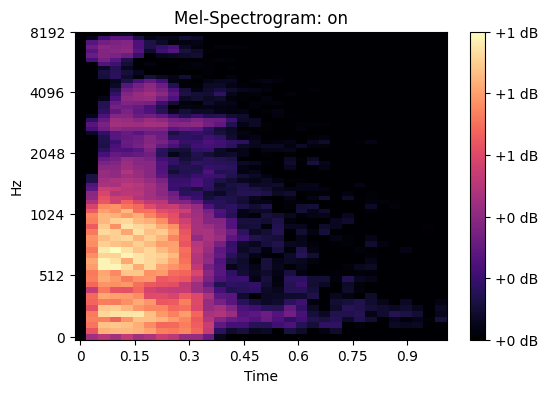

In [10]:
import numpy as np
import librosa
import librosa.display

# Parameters for spectrogram
n_mels = 64       # number of Mel bands
n_fft = 1024      # FFT window size
hop_length = 512  # hop between frames
duration = 1.0    # duration in seconds to fix all audios
sr = 16000        # sampling rate

def audio_to_melspec(file_path):
    y, _ = librosa.load(file_path, sr=sr, duration=duration)
    # Pad or trim to make exactly duration*sr samples
    if len(y) < int(sr*duration):
        y = np.pad(y, (0, int(sr*duration)-len(y)))
    else:
        y = y[:int(sr*duration)]

    mel_spec = librosa.feature.melspectrogram(
        y=y,           # keyword argument
        sr=sr,
        n_fft=n_fft,
        hop_length=hop_length,
        n_mels=n_mels
    )

    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    # Normalize between 0 and 1
    mel_spec_db = (mel_spec_db - mel_spec_db.min()) / (mel_spec_db.max() - mel_spec_db.min())
    return mel_spec_db

# Test one file
spec = audio_to_melspec(file_paths[0])
print("Spectrogram shape:", spec.shape)

# Visualize
plt.figure(figsize=(6,4))
librosa.display.specshow(spec, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title(f"Mel-Spectrogram: {classes[labels[0]]}")
plt.show()

In [12]:
import numpy as np
from glob import glob  # <- this was missing

# Map folder names to integer labels
label_map = {'on':0, 'happy':1, 'follow':2}
folders = ['on', 'happy', 'follow']

X = []
y = []

for folder in folders:
    print(f"Processing folder: {folder}")
    for file_path in glob(f'./{folder}/*.wav'):
        mel_spec = audio_to_melspec(file_path)
        mel_spec = np.expand_dims(mel_spec, axis=-1)
        X.append(mel_spec)
        y.append(label_map[folder])

X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.int32)

print("X shape:", X.shape)
print("y shape:", y.shape)

Processing folder: on
Processing folder: happy
Processing folder: follow
X shape: (7478, 64, 32, 1)
y shape: (7478,)


In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical
y_cat = to_categorical(y, num_classes=3)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 5982
Testing samples: 1496


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models

input_shape = X_train.shape[1:]  # e.g., (128, 32, 1)

model = models.Sequential([
    layers.Input(shape=input_shape),

    layers.Conv2D(16, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes: on/happy/follow
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 8, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 8, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,627 (604.01 KB)

 Trainable params: 154,627 (604.01 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.6218 - loss: 0.8167 - val_accuracy: 0.8930 - val_loss: 0.2887
Epoch 2/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8922 - loss: 0.2745 - val_accuracy: 0.9084 - val_loss: 0.2441
Epoch 3/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9262 - loss: 0.1893 - val_accuracy: 0.9452 - val_loss: 0.1555
Epoch 4/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9577 - loss: 0.1172 - val_accuracy: 0.9545 - val_loss: 0.1307
Epoch 5/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9605 - loss: 0.1030 - val_accuracy: 0.9606 - val_loss: 0.1150
Epoch 6/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9767 - loss: 0.0709 - val_accuracy: 0.9646 - val_loss: 0.0984
Epoch 7/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9792 - loss: 0.0566 - val_accuracy: 0.9579 - val_loss: 0.1100
Epoch 8/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9800 - loss: 0.0563 - val_accuracy: 0

In [16]:
import tensorflow as tf

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Enable full integer quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# For full integer quantization, provide a representative dataset
def representative_data_gen():
    for i in range(100):  # use 100 samples
        sample = X_train[i:i+1]
        yield [sample.astype('float32')]

converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

# Set input/output to int8
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

tflite_model = converter.convert()

# Save the TFLite model
with open("qcnn_model.tflite", "wb") as f:
    f.write(tflite_model)

print("Quantized TFLite model saved as qcnn_model.tflite")

Saved artifact at '/tmp/tmpf_tvubm1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 32, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  138543219590928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138543219592080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138543219589968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138543219589584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138543219589392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138543219591504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138543219592464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138543219591312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138543219591696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138543219590736: TensorSpec(shape=(), dtype=tf.resource, name=None)


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/convert.py:854: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


Quantized TFLite model saved as qcnn_model.tflite


In [18]:
# Get input details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Example: test sample
sample = X_test[0:1].astype('float32')  # original float32

# Quantize the input
input_scale, input_zero_point = input_details[0]['quantization']
sample_int8 = (sample / input_scale + input_zero_point).astype('int8')

# Set tensor and run
interpreter.set_tensor(input_details[0]['index'], sample_int8)
interpreter.invoke()

# Get output
output = interpreter.get_tensor(output_details[0]['index'])
print("Raw output:", output)

# Dequantize output if needed
output_scale, output_zero_point = output_details[0]['quantization']
output_float = (output.astype('float32') - output_zero_point) * output_scale
print("Dequantized output:", output_float)

Raw output: [[ 127 -128 -128]]
Dequantized output: [[0.99609375 0.         0.        ]]


In [19]:
import shutil
# Create a folder to store your model
!mkdir -p saved_models

# Move the TFLite model there
shutil.move('qcnn_model.tflite', 'saved_models/qcnn_model.tflite')

'saved_models/qcnn_model.tflite'